# Diabetes Patients Analysis using python

Description: This dataset is originally from the National Institute of Daibetes and Kidney diseases.We will be predicting whether the patient has diabetes or not on the basis of the features we provide to our machine learning model.

# Content

The dataset consists of several medical predictor variables and one target variable, Outcome.Predictor variables includes the number of pregnancies, the patient has had their BMI, Glucose level, BP, age and so on.

# Problem Statement

We will be predicting whether the patient has diabetes or not on the basis of the features we provide to our machine learning model.

# Data Description:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

# Importing Libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
%matplotlib inline

# Data collection and Analysis

### Loading from .csv file to a dataframe df

In [4]:
df=pd.read_csv('diabetes.csv')

In [5]:
df.head() # Fetches the first 5 records from the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()   # Fetches the last 5 records from the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()   # Fetches information about the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# All the columns are of numerical datatype

In [8]:
df.shape

(768, 9)

# This dataframe consists of 768 rows and 9 columns

# Statistical measures of the data

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Most of the features have zeros as minimum value 

In [10]:
df[df['Glucose']==0].shape[0]

5

In [11]:
df[df['BloodPressure']==0].shape[0]

35

In [12]:
df[df['SkinThickness']==0].shape[0]

227

In [13]:
df[df['Insulin']==0].shape[0]

374

In [14]:
df[df['BMI']==0].shape[0]

11

## Insights
- #### 5 values of Glucose have zero's

- #### 35 values of Blood Pressure have zero's

- #### 227 values of Skin Thickness have zero's

- #### 374 values of Insulin have zero's

- #### 11 values of BMI have zero's

<AxesSubplot: xlabel='Glucose'>

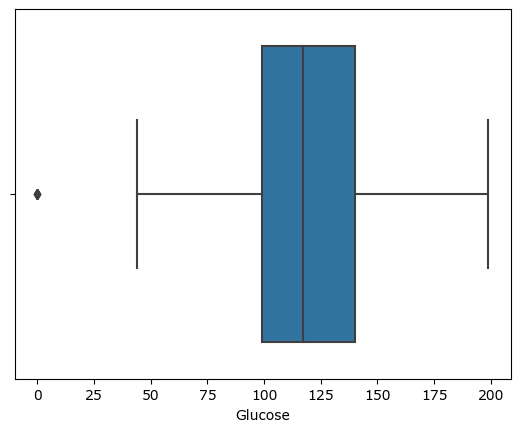

In [15]:
sns.boxplot(x='Glucose',data=df)

<AxesSubplot: xlabel='BloodPressure'>

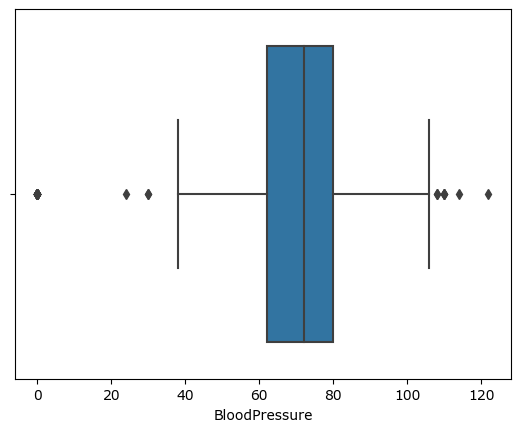

In [16]:
sns.boxplot(x='BloodPressure',data=df)

<AxesSubplot: xlabel='SkinThickness'>

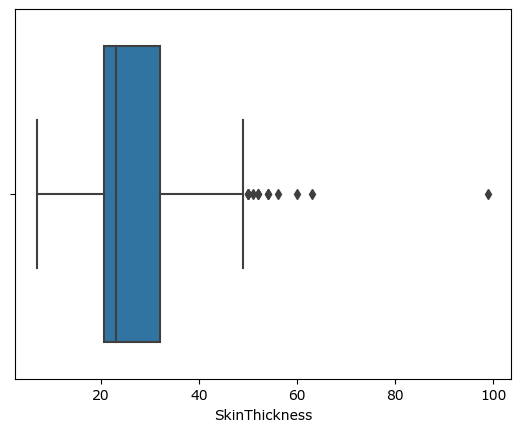

In [79]:
sns.boxplot(x='SkinThickness',data=df)

<AxesSubplot: xlabel='Insulin'>

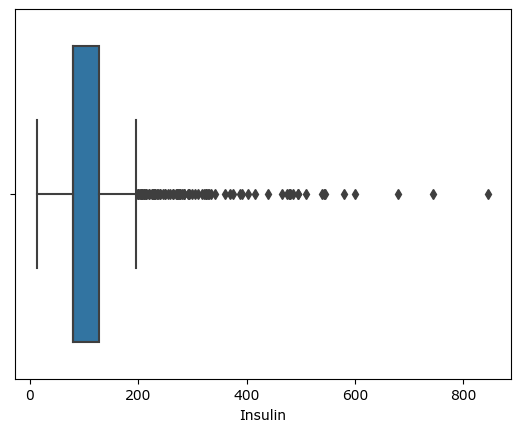

In [80]:
sns.boxplot(x='Insulin',data=df)

<AxesSubplot: xlabel='BMI'>

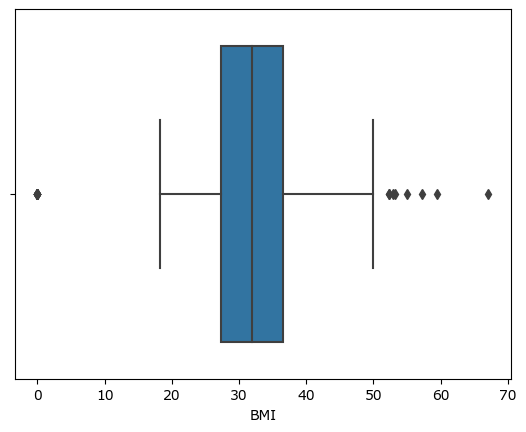

In [17]:
sns.boxplot(x='BMI',data=df)

## Replacing the zero's with the median of that feature since all these features have outliers

In [81]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())

In [82]:
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())

In [83]:
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [84]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [85]:
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [86]:
# Lets check the minimum value for each column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Fetches the total number of NULL records for each feature

In [87]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Insights:
- ##### Data does not contain any NULL records

### Fetches count of duplicate rows

In [88]:
df.duplicated().sum()

0

##### Insights:
- ##### Data does not contain any Duplicate records

### Fetches the count of each value of the feature 'Outcome'

In [89]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Insights:
- #### 0 -> Non diabetic
- #### 1 -> Diabetic
- ####  Target column Outcome is imbalanced. 

## Plotting a bar chart to visualize the values of outcome

<AxesSubplot: >

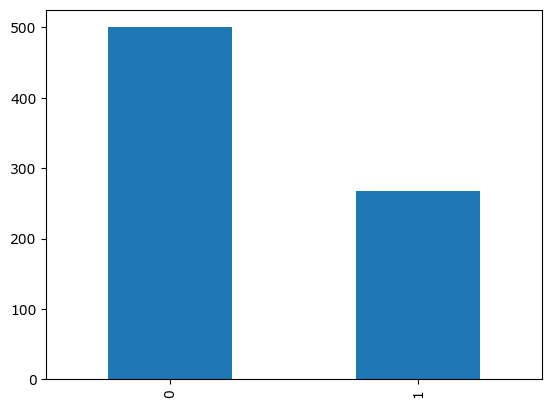

In [90]:
df['Outcome'].value_counts().plot(kind='bar')

Insights:
- Patients not diabetic are more in number than patients who are diabetic

# Grouping on Outcome to fetch the mean difference between each column

In [91]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


<AxesSubplot: xlabel='Age', ylabel='Count'>

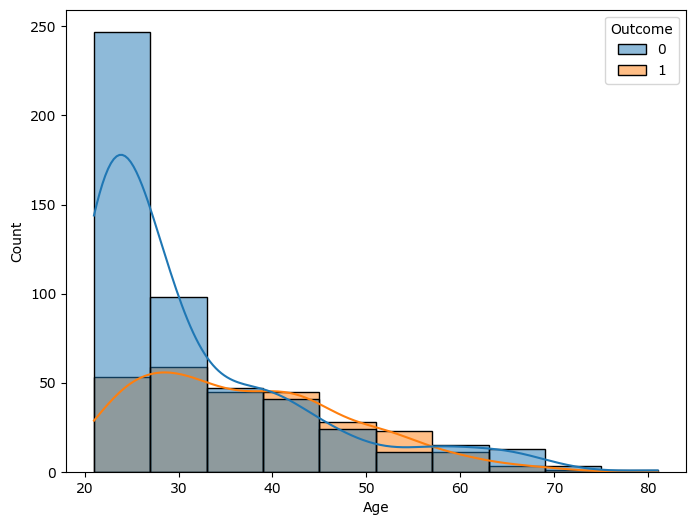

In [138]:
plt.figure(figsize=(8,6))
sns.histplot(data= df,x='Age',hue='Outcome',bins=10,kde=True)

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

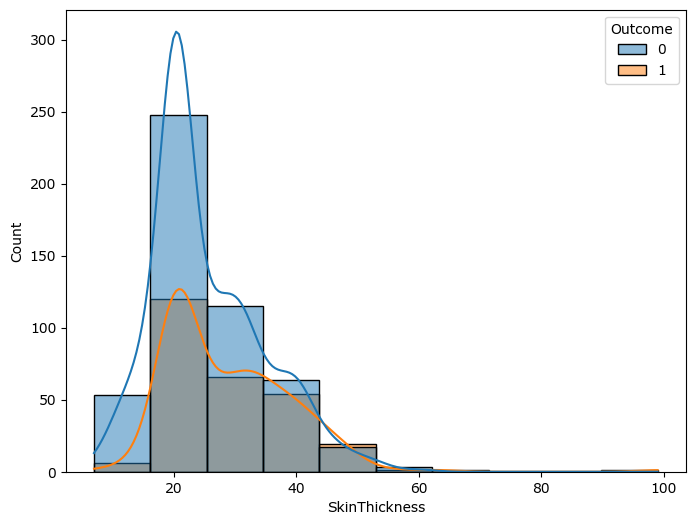

In [137]:
plt.figure(figsize=(8,6))
sns.histplot(data= df,x='SkinThickness',hue='Outcome',bins=10,kde=True)

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

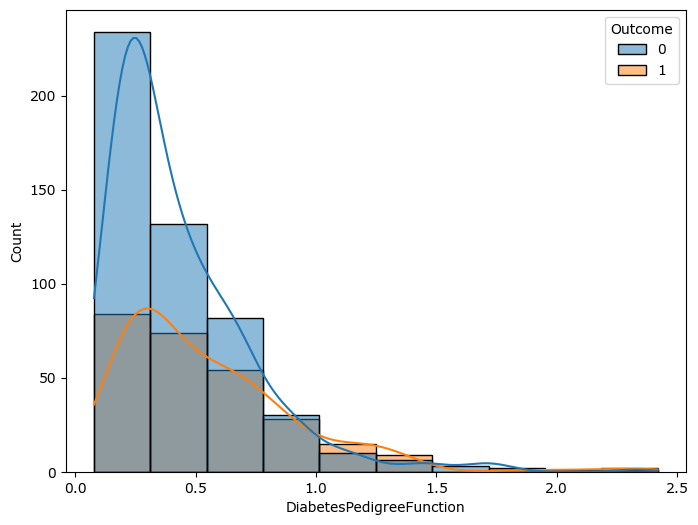

In [136]:
plt.figure(figsize=(8,6))
sns.histplot(data= df,x='DiabetesPedigreeFunction',hue='Outcome',bins=10,kde=True)

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

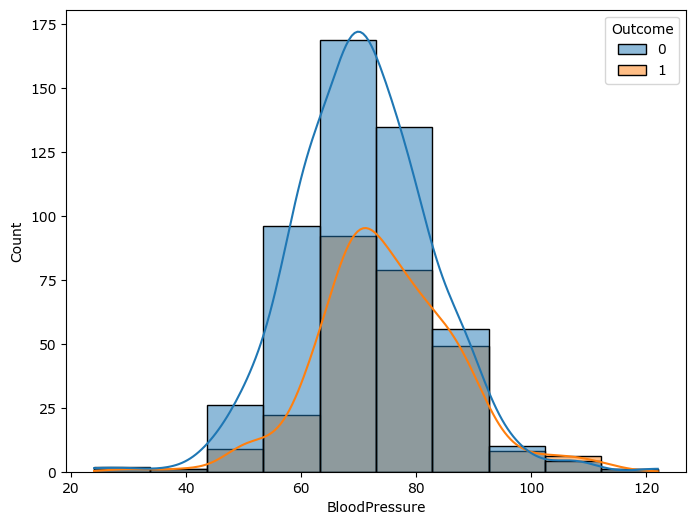

In [143]:
plt.figure(figsize=(8,6))
sns.histplot(data= df,x='BloodPressure',hue='Outcome',bins=10,kde=True)

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

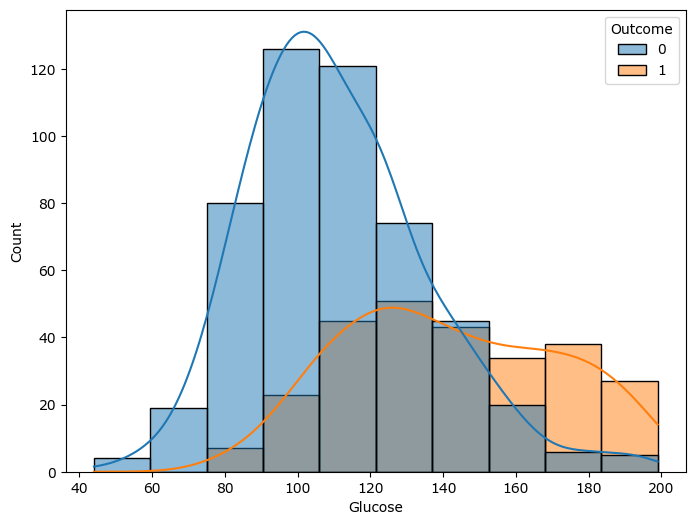

In [97]:
plt.figure(figsize=(8,6))

sns.histplot(data= df,x='Glucose',hue='Outcome',bins=10,kde=True)

<AxesSubplot: xlabel='BMI', ylabel='Count'>

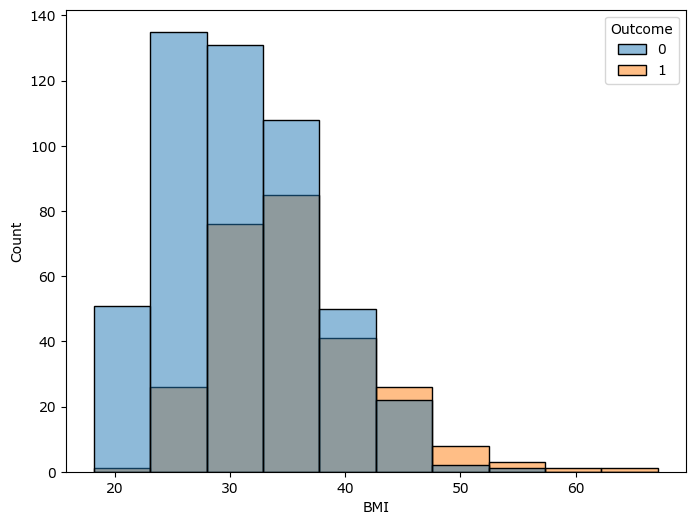

In [144]:
plt.figure(figsize=(8,6))

sns.histplot(data= df,x='BMI',hue='Outcome',bins=10,kde=True)

# Insights:

- ### Between the age groups 40-55 , people having diabetes outnumbers the non diabetic patients
- ### Skin thickness in diabetic patients outnumbers non-diabetic patients and is in the range of 43 mm-53 mm
- ### Diabetes Pedigree Function in diabetic patients outnumbers non-diabetic patients in the range 1-1.5
- ### BloodPressure in diabetes patients outnumbers non-diabetic patients slightly and is in the range 102-122
- ### Glucose level in diabetes patients outnumbers non-diabetic patients largely and is in the range 150-200
- ### BMI level in diabetes patients outnumbers non-diabetic patients slightly and is above 43

In [99]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot: >

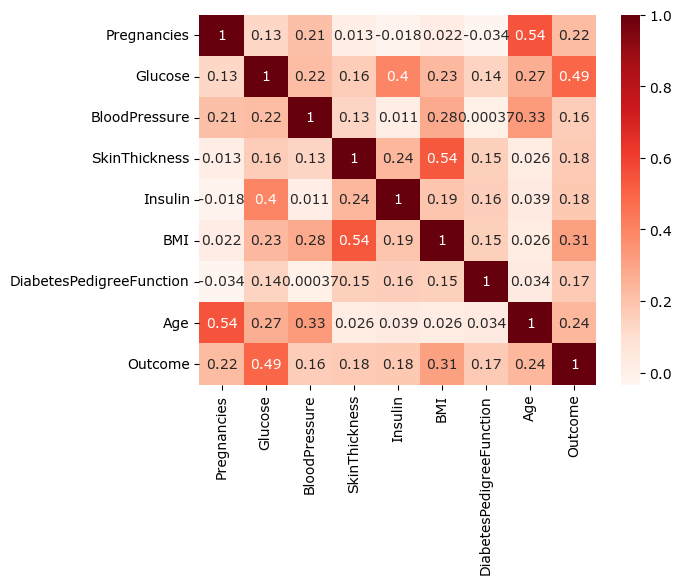

In [100]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

# Insights:

- ### Age and Pregnancies are positively correlated with 0.54
- ### Glucose and outcomes are positively correlated with 0.49
- ### Blood pressure, Diabetes Pedigree Function,  Insulin and Skin Thickness are not correlated with the outcome

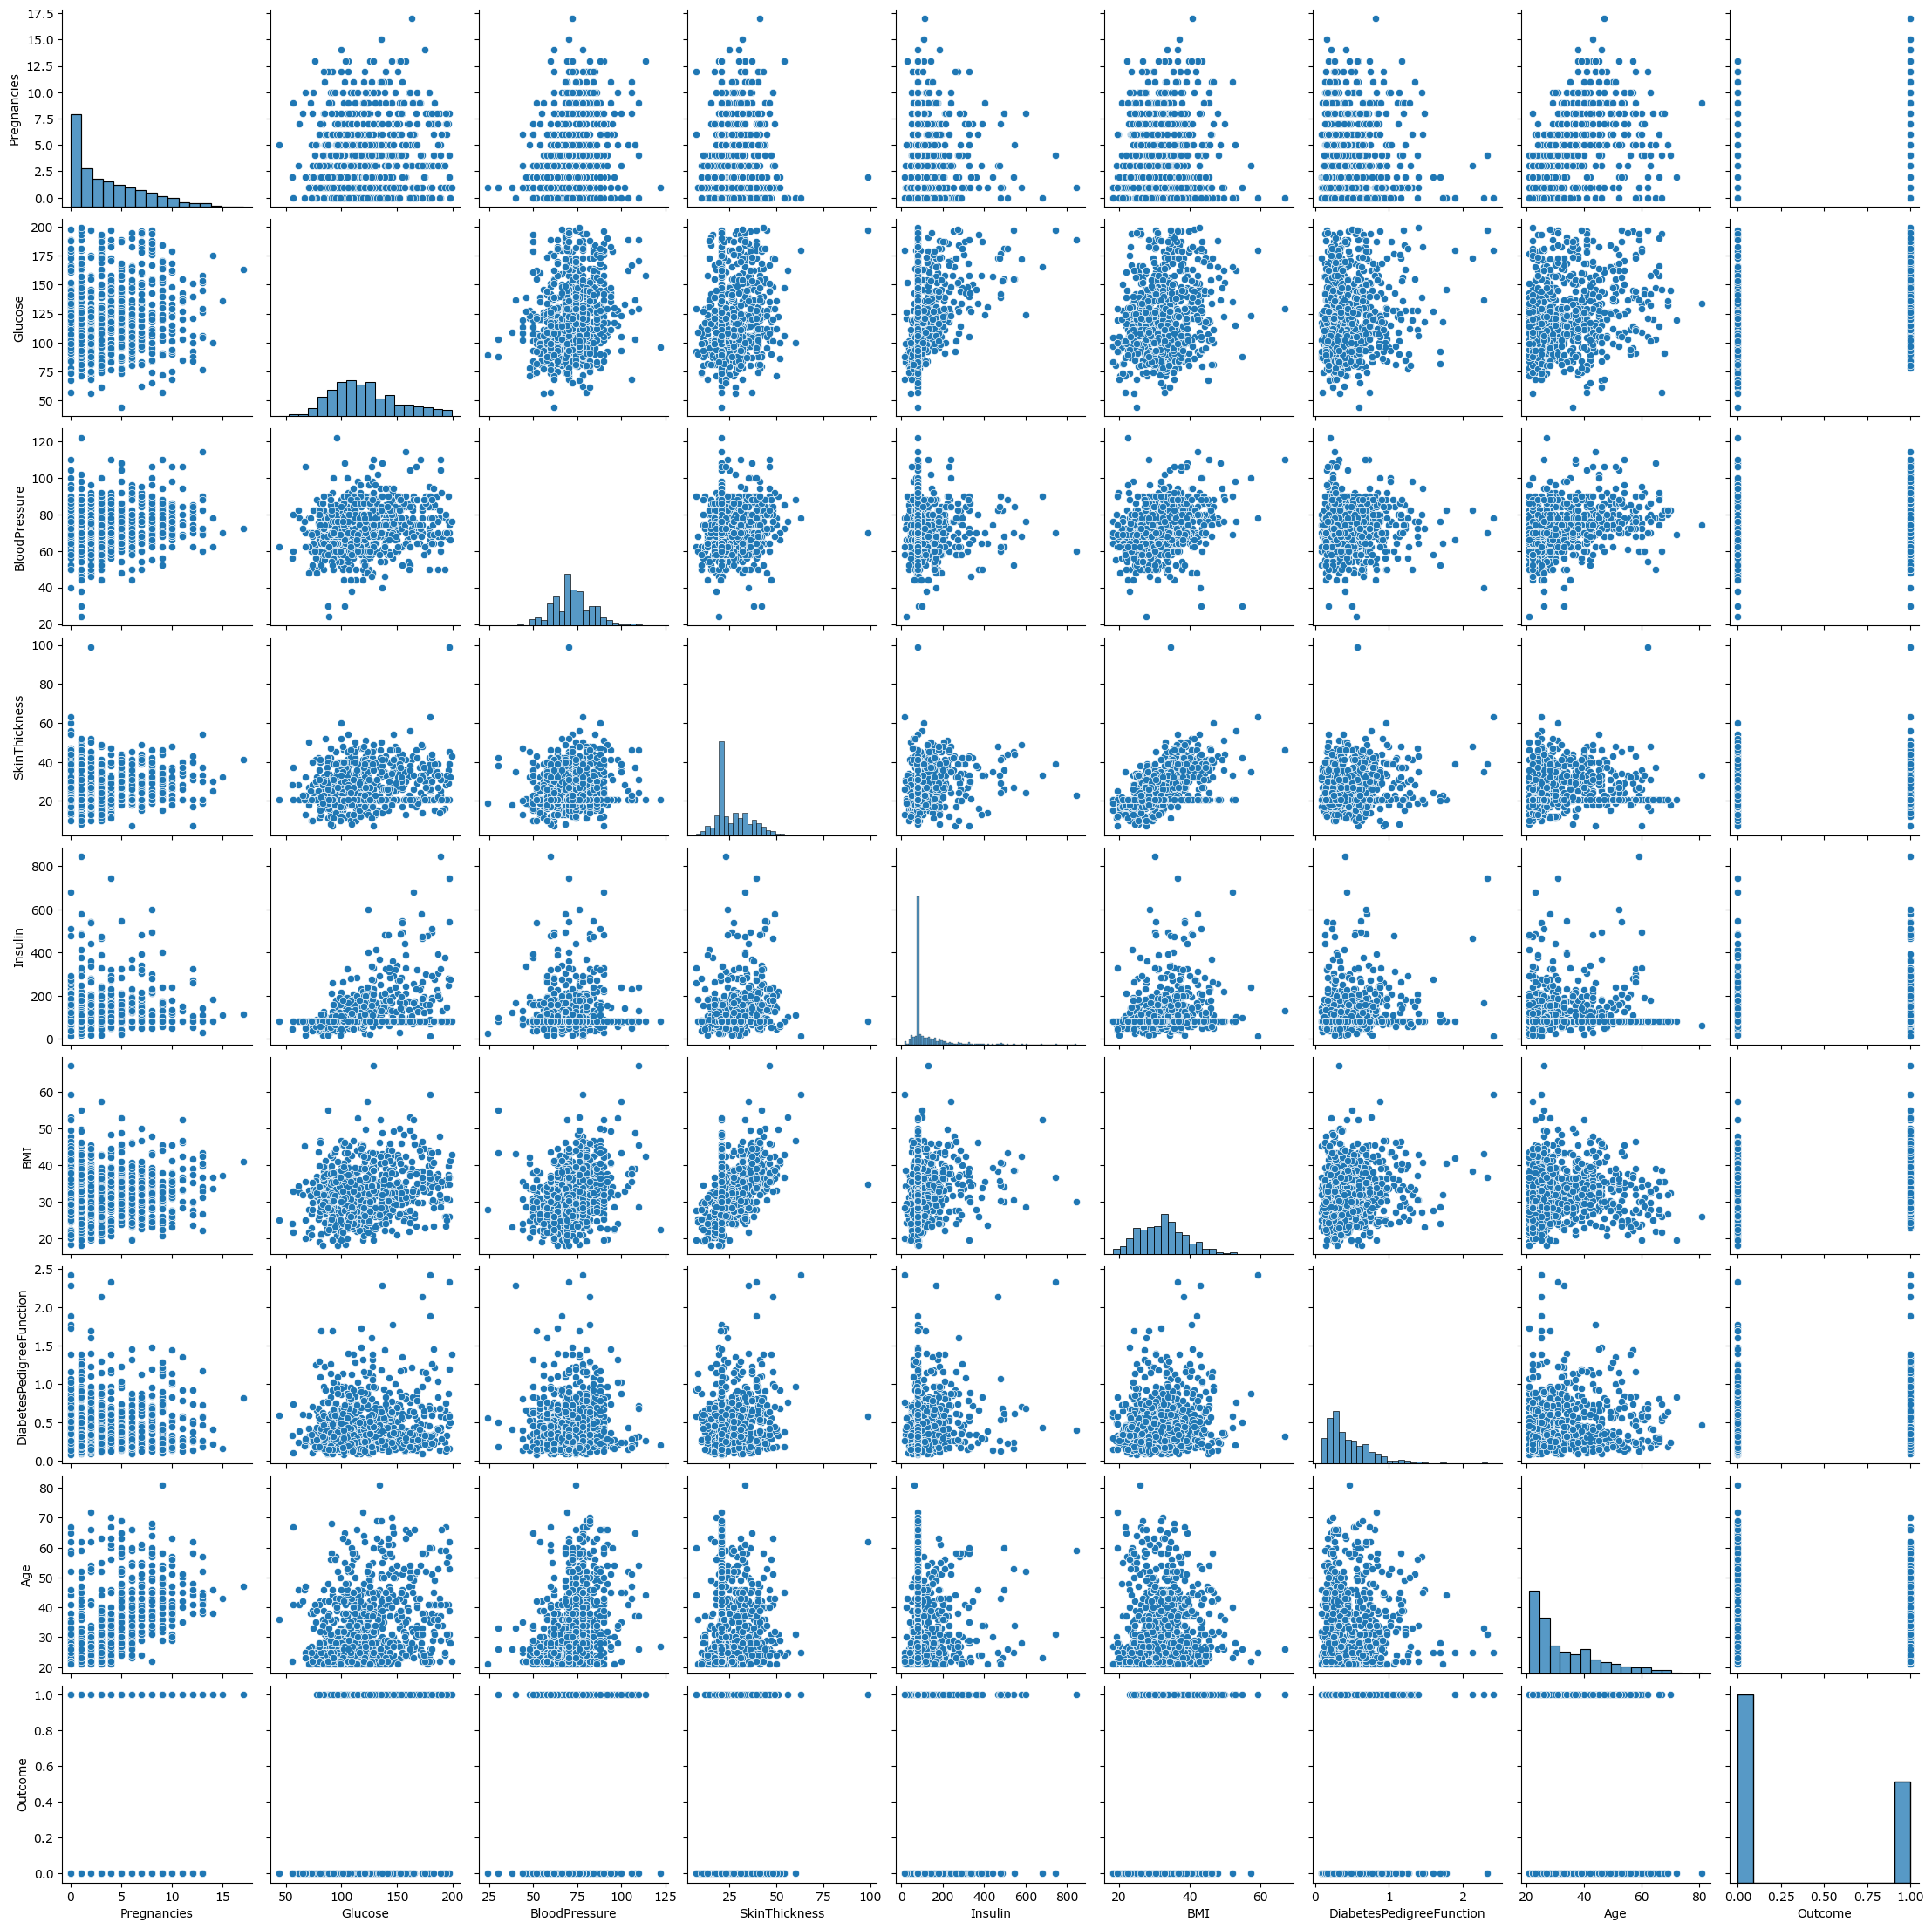

In [101]:
sns.pairplot(df)

## Splitting of data into X and Y

In [102]:
X=df.drop('Outcome',axis=1)
y=df.iloc[:,-1]

In [103]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [104]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Standardization of data

In [105]:
std=StandardScaler()

In [106]:
std=std.fit_transform(X)

In [107]:
print(std)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16725546  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85153454 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33182125  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90975111 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34213954 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29847711 -0.47378505
  -0.87137393]]


In [108]:
X=std

### Split into train and test

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [110]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(537, 8) (231, 8) (537,) (231,)


## Training the model

#### LogisticRegression



In [111]:
log=LogisticRegression()

In [112]:
log.fit(X_train,y_train)

LogisticRegression()

In [113]:
y_pred_train=log.predict(X_train)

In [114]:
print("Accuracy_Score =", format(accuracy_score(y_train, y_pred_train)))

Accuracy_Score = 0.7914338919925512


In [115]:
y_pred_test=log.predict(X_test)

In [116]:
print("Accuracy_Score =", format(accuracy_score(y_test, y_pred_test)))
print("Classification Report =", format(classification_report(y_test, y_pred_test)))
print("Confusion Matrix =", format(confusion_matrix(y_test, y_pred_test)))


Accuracy_Score = 0.7445887445887446
Classification Report =               precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix = [[129  21]
 [ 38  43]]


### Insights:
- ### Training Accuracy score is 79%
- ### Test accuracy score is 74% 

#### SVM

In [117]:
svm_classi=svm.SVC(kernel='linear')

In [118]:
svm_classi.fit(X_train,y_train)

SVC(kernel='linear')

In [119]:
y_pred_train=svm_classi.predict(X_train)

In [120]:
print("Accuracy_Score =", format(accuracy_score(y_train, y_pred_train)))

Accuracy_Score = 0.7877094972067039


In [121]:
y_pred_test=svm_classi.predict(X_test)

In [122]:
print("Accuracy_Score =", format(accuracy_score(y_test, y_pred_test)))
print("Classification Report =", format(classification_report(y_test, y_pred_test)))
print("Confusion Matrix =", format(confusion_matrix(y_test, y_pred_test)))

Accuracy_Score = 0.7316017316017316
Classification Report =               precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.66      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231

Confusion Matrix = [[129  21]
 [ 41  40]]


### Insights:
- ### Training Accuracy score is 79%
- ### Test accuracy score is 73%

#### RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rfc = RandomForestClassifier(n_estimators=200)

In [125]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [126]:
y_pred_train=rfc.predict(X_train)

In [127]:
print("Accuracy_Score =", format(accuracy_score(y_train, y_pred_train)))

Accuracy_Score = 1.0


In [128]:
y_pred_test=rfc.predict(X_test)

In [129]:
print("Accuracy_Score =", format(accuracy_score(y_test, y_pred_test)))
print("Classification Report =", format(classification_report(y_test, y_pred_test)))
print("Confusion Matrix =", format(confusion_matrix(y_test, y_pred_test)))

Accuracy_Score = 0.7532467532467533
Classification Report =               precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.56      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

Confusion Matrix = [[129  21]
 [ 36  45]]


### Insights:
- ### Training Accuracy score is 100%
- ### Test accuracy score is 74%

### Accuracy Score =1. So here we can see that on the training dataset our model is overfitted.

#### Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
y_pred_train=dtree.predict(X_train)

In [133]:
print("Accuracy_Score =", format(accuracy_score(y_train, y_pred_train)))

Accuracy_Score = 1.0


In [134]:
y_pred_test=dtree.predict(X_test)

In [135]:
print("Accuracy_Score =", format(accuracy_score(y_test, y_pred_test)))
print("Classification Report =", format(classification_report(y_test, y_pred_test)))
print("Confusion Matrix =", format(confusion_matrix(y_test, y_pred_test)))

Accuracy_Score = 0.70995670995671
Classification Report =               precision    recall  f1-score   support

           0       0.76      0.80      0.78       150
           1       0.59      0.54      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231

Confusion Matrix = [[120  30]
 [ 37  44]]


### Insights:
- ### Training Accuracy score is 100%
- ### Test accuracy score is 70%

### Accuracy Score =1. So here we can see that on the training dataset our model is overfitted.

# Logistic Regression and SVM are the best models as it has the highest accuracy score for training and test datasets.